# Loading modules and data

In [44]:
from pyemma.coordinates import tica
from msmbuilder.example_datasets import AlanineDipeptide
import matplotlib.pyplot as plt

trajs = AlanineDipeptide().get().trajectories
import numpy as np

from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))
X = AtomPairsFeaturizer(pairs).fit_transform(trajs)

from msmbuilder.featurizer import DihedralFeaturizer
Y = DihedralFeaturizer().fit_transform(trajs)

alanine_dipeptide already is cached


# Perfoming tica on the X features:

In [45]:
obj_x = tica(np.vstack(X), lag = 1, dim = 2).get_output()[0]

In [46]:
obj_x = np.array(obj_x)

Text(0.5,1,'projection onto first two observable tICs')

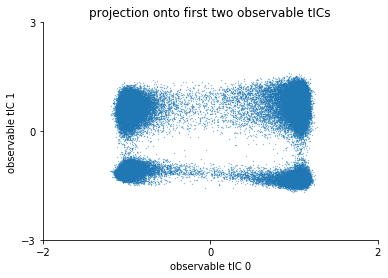

In [47]:
ax = plt.subplot(111)
plt.scatter(obj_x.T[0], obj_x.T[1], s=0.1, alpha=0.7)
plt.xlabel('observable tIC 0')
plt.ylabel('observable tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('projection onto first two observable tICs')

# Performing tica on Y features

In [48]:
obj_y = tica(np.vstack(Y), lag = 1, dim = 2).get_output()
print (type(obj_y))

<class 'list'>


In [49]:

obj_y = np.array(obj_y)

Text(0.5,1,'projection onto first two observable tICs')

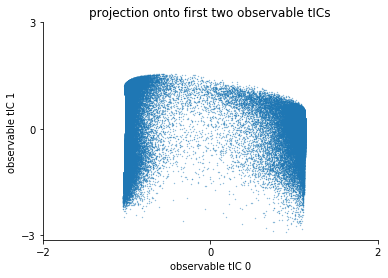

In [50]:
ax = plt.subplot(111)
plt.scatter(obj_y.T[0], obj_y.T[1], s=0.1, alpha=0.7)
plt.xlabel('observable tIC 0')
plt.ylabel('observable tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('projection onto first two observable tICs')

# Graphing (tIC0_X, tIC0_Y) 

Text(0.5,1,'projection onto first two observable tICs')

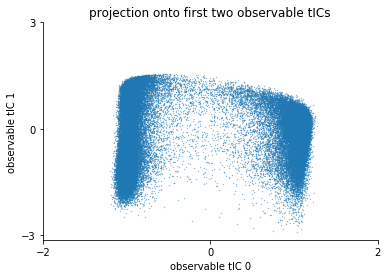

In [52]:
ax = plt.subplot(111)
plt.scatter(obj_x.T[0], obj_y.T[1], s=0.1, alpha=0.7)
plt.xlabel('observable tIC 0')
plt.ylabel('observable tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('projection onto first two observable tICs')